In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers

In [5]:
train_df = pd.read_csv(r"C:\Users\prati\Downloads\mnist_train.csv")
test_df = pd.read_csv(r"C:\Users\prati\Downloads\mnist_test.csv")

In [8]:
X_train = train_df.iloc[:,1:].values
y_train = train_df.iloc[:,0].values

In [9]:
X_test = test_df.iloc[:,1:].values
y_test = test_df.iloc[:,0].values

In [10]:
X_train = X_train/255.0
X_teat = X_test/255.0

In [11]:
X_train.shape
X_test.shape

(10000, 784)

In [43]:
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

In [44]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [45]:
history = model.fit(
    X_train,y_train,
    validation_split = 0.1,
    epochs = 5,
    batch_size = 128,
    verbose = 1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8990 - loss: 0.3715 - val_accuracy: 0.9510 - val_loss: 0.1715
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9508 - loss: 0.1716 - val_accuracy: 0.9667 - val_loss: 0.1210
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9649 - loss: 0.1227 - val_accuracy: 0.9688 - val_loss: 0.1025
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9726 - loss: 0.0946 - val_accuracy: 0.9740 - val_loss: 0.0908
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9778 - loss: 0.0769 - val_accuracy: 0.9785 - val_loss: 0.0808


In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

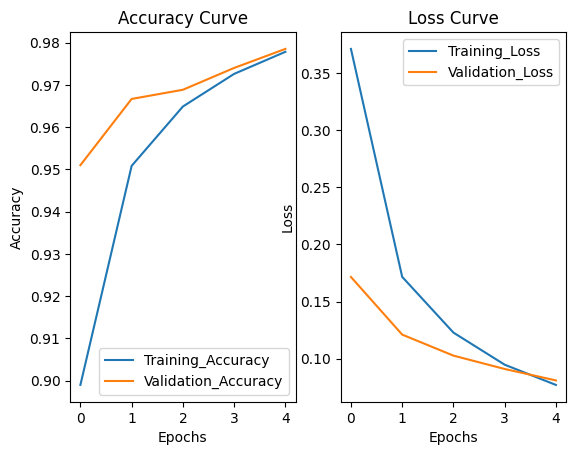

In [47]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training_Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation_Accuracy')
plt.title("Accuracy Curve")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training_Loss')
plt.plot(history.history['val_loss'],label='Validation_Loss')
plt.title("Loss Curve")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [48]:
test_acc,test_loss = model.evaluate(X_test,y_test,verbose=0)

In [49]:
print("Test Accuracy",test_acc)
print("Test Loss",test_loss)

Test Accuracy 11.7559175491333
Test Loss 0.9749000072479248
